# Compare generic genes

The goal of this notebook is to compare the generic genes found using 2 different recount2 template experiments to determine ____

In [1]:
%load_ext autoreload
%autoreload 2

import os
import seaborn as sns
import pandas as pd
from ponyo import utils

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Read in config variables
base_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))
config_filename = os.path.abspath(
    os.path.join(base_dir, "configs", "config_human_general.tsv")
)

params = utils.read_config(config_filename)

local_dir = params["local_dir"]

project_id1 = "SRP012656"
project_id2 = "SRP061689"

In [3]:
# Get data directory containing gene summary data
data_dir = os.path.join(base_dir, "human_general_analysis")

# Get gene ranking files
gene_ranking_filename1 = os.path.join(data_dir, f"generic_gene_summary_{project_id1}.tsv")
gene_ranking_filename2 = os.path.join(data_dir, f"generic_gene_summary_{project_id2}.tsv")

# Get template data
template_filename1 = os.path.join(data_dir, "data", f"processed_recount2_template_{project_id1}.tsv")
template_filename2 = os.path.join(data_dir, "data", f"processed_recount2_template_{project_id2}.tsv")

## Correlation between rankings

In [4]:
# Load gene ranking
gene_ranking_summary1 = pd.read_csv(gene_ranking_filename1, sep="\t", index_col=0, header=0)
gene_ranking_summary2 = pd.read_csv(gene_ranking_filename2, sep="\t", index_col=0, header=0)

In [5]:
# Get simulated ranking
gene_ranking1 = gene_ranking_summary1["Rank (simulated)"].rename("Rank 1")
gene_ranking2 = gene_ranking_summary2["Rank (simulated)"].rename("Rank 2")

# Combine ranking
gene_ranking_combined = pd.concat([gene_ranking1, gene_ranking2], axis=1)

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [16]:
gene_ranking_combined.loc[gene_ranking_combined.isna().any(axis=1)]

,Rank 1,Rank 2


/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'fig.savefig(\n    output_figure_filename,\n    format="svg",\n    bbox_inches="tight",\n    transparent=True,\n    pad_inches=0,\n    dpi=300,\n)'

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


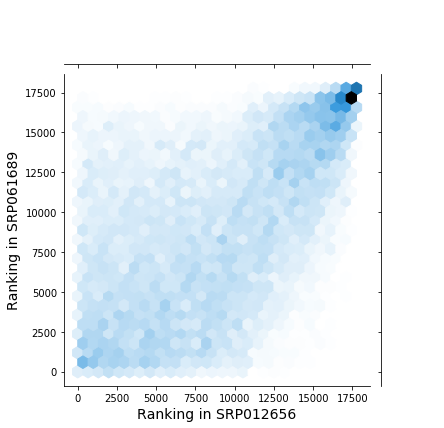

In [7]:
# Plot correlation between ranking
fig = sns.jointplot(
    data=gene_ranking_combined,
    x="Rank 1",
    y="Rank 2",
    kind="hex",
    marginal_kws={"color": "white"},
)

fig.set_axis_labels(
    f"Ranking in {project_id1}", f"Ranking in {project_id2}", fontsize=14, fontname="Verdana"
)

"""fig.savefig(
    output_figure_filename,
    format="svg",
    bbox_inches="tight",
    transparent=True,
    pad_inches=0,
    dpi=300,
)"""

In [8]:
print(gene_ranking1.shape)
gene_ranking_summary1.loc["A1CF"]

(17755,)


Gene ID                                      A1CF
Adj P-value (Real)                       0.224367
Rank (Real)                                 14027
abs(log2FoldChange) (Real)                1.14097
log2FoldChange (Real)                     1.14097
Median adj p-value (simulated)          0.0641451
Rank (simulated)                            17086
Mean abs(log2FoldChange) (simulated)      2.65063
Std deviation (simulated)                 2.33318
Number of experiments (simulated)              21
Z score                                 -0.647039
Name: A1CF, dtype: object

In [9]:
print(gene_ranking2.shape)
gene_ranking_summary2.loc["A1CF"]

(17755,)


Gene ID                                     A1CF
Adj P-value (Real)                           NaN
Rank (Real)                                  NaN
abs(log2FoldChange) (Real)                   NaN
log2FoldChange (Real)                        NaN
Median adj p-value (simulated)          0.463686
Rank (simulated)                           15334
Mean abs(log2FoldChange) (simulated)    0.458266
Std deviation (simulated)                0.41937
Number of experiments (simulated)             24
Z score                                      NaN
Name: A1CF, dtype: object

**Takeaway:**

* Looks like there is good concordance between highly ranked genes (i.e. generic genes)
* Are the gene rankings robust? We expect that there are some genes that are generally generic and there are also genes that are generic within the given context.

## Examine gene expression data

In [10]:
template_1 = pd.read_csv(template_filename1, sep="\t", index_col=0, header=0)
template_2 = pd.read_csv(template_filename2, sep="\t", index_col=0, header=0)

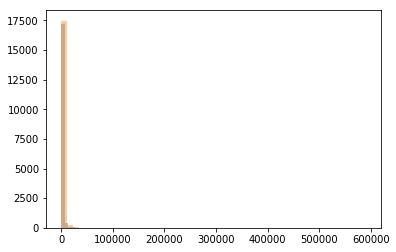

In [17]:
sns.distplot(template_1.mean(), kde=False)
sns.distplot(template_2.mean(), kde=False)

**Takeaway:**

Are there differences in the distribution of mean gene expression? Doesn't look like there are

Do we expect that differences in gene expression in the template experiment will yeild different generic genes? Theoretically, if a gene is lowly expressed in the context of template experiment 1 it shouldn't be found to be generic. But this same gene could be found to be generic in the context of template experiment 2 if it is more expressed.